In [ ]:
!pip install cartopy matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [ ]:
df = pd.read_csv("clustering_data.csv", dtype={'Latitude': str, 'Longitude': str})
filtered_df = df[df["StateName"]=="KARNATAKA"].copy()
print(filtered_df)

              CircleName              RegionName        DivisionName  \
429     Karnataka Circle  North Karnataka Region      Bidar Division   
430     Karnataka Circle  North Karnataka Region      Bidar Division   
1202    Karnataka Circle  South Karnataka Region  Mangaluru Division   
9790    Karnataka Circle  South Karnataka Region     Hassan Division   
9791    Karnataka Circle  South Karnataka Region     Hassan Division   
...                  ...                     ...                 ...   
156499  Karnataka Circle  North Karnataka Region    Dharwad Division   
156500  Karnataka Circle  North Karnataka Region    Dharwad Division   
156501  Karnataka Circle  North Karnataka Region    Dharwad Division   
156502  Karnataka Circle  North Karnataka Region    Dharwad Division   
156503  Karnataka Circle  North Karnataka Region    Dharwad Division   

                      OfficeName  Pincode OfficeType      Delivery  \
429                MANHALLI  S.O   585447         PO      Deliver

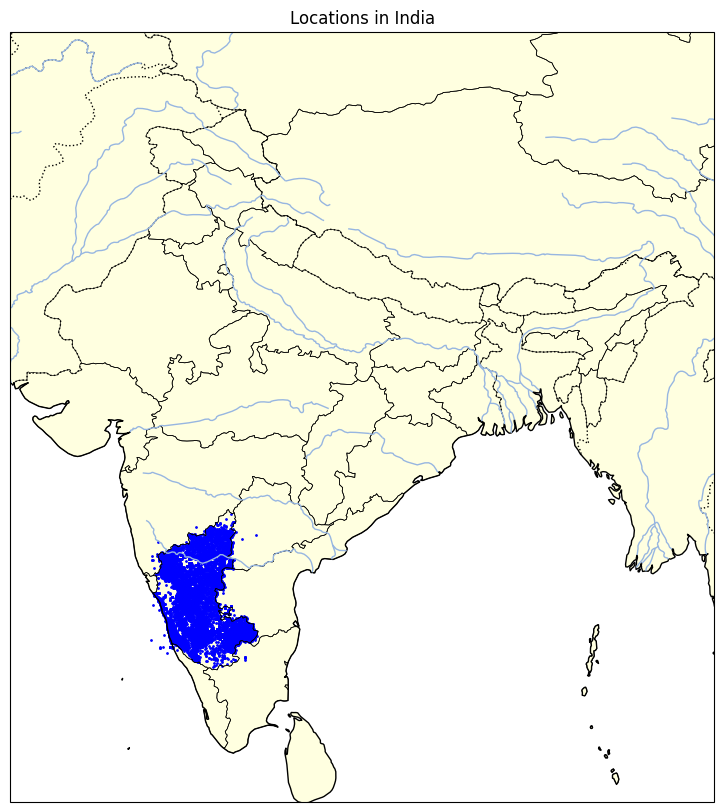

In [ ]:
filtered_df["Latitude"] = pd.to_numeric(filtered_df["Latitude"], errors='coerce') #Converts the latitude into float datatype and ignores NA
filtered_df["Longitude"] = pd.to_numeric(filtered_df["Longitude"], errors='coerce') #Converts the longitude into float datatype and ignores NA
filtered_df.dropna(subset=["Latitude", "Longitude"], inplace=True) # modify the filtered_df such that it removes NA latitude and longitude
lat_min, lat_max = 11.5, 18.5 #Boundary conditions for points of Karnataka
lon_min, lon_max = 74.0, 78.5

#Removing the outliers and noisy points
filtered_df = filtered_df[
    (filtered_df['Latitude'] >= lat_min) &
    (filtered_df['Latitude'] <= lat_max) &
    (filtered_df['Longitude'] >= lon_min) &
    (filtered_df['Longitude'] <= lon_max)
]
#Plotting the points
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98, 6, 38])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightyellow')
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.RIVERS)
ax.scatter(filtered_df['Longitude'], filtered_df['Latitude'], color='blue', s=1, label='Pincodes', transform=ccrs.PlateCarree())

plt.title("Locations in India")
plt.show()

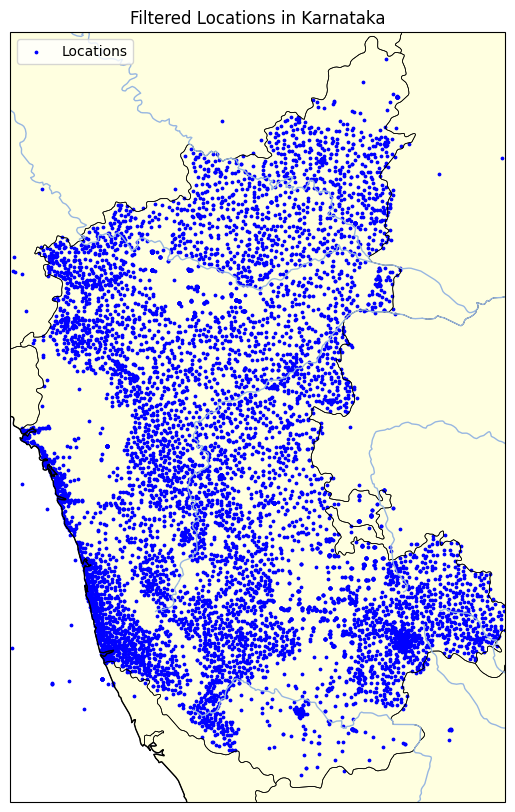

In [83]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and longitude limits specific to Karnataka
lat_min, lat_max = 11.5, 18.5
lon_min, lon_max = 74.0, 78.5

# Convert and filter data
filtered_df["Latitude"] = pd.to_numeric(filtered_df["Latitude"], errors='coerce')
filtered_df["Longitude"] = pd.to_numeric(filtered_df["Longitude"], errors='coerce')
filtered_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

filtered_df = filtered_df[
    (filtered_df['Latitude'] >= lat_min) &
    (filtered_df['Latitude'] <= lat_max) &
    (filtered_df['Longitude'] >= lon_min) &
    (filtered_df['Longitude'] <= lon_max)
]

# Plot only Karnataka region
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set extent to Karnataka only
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightyellow')
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot filtered points
ax.scatter(filtered_df['Longitude'], filtered_df['Latitude'], color='blue', s=3, label='Locations', transform=ccrs.PlateCarree())

plt.title("Filtered Locations in Karnataka")
plt.legend()
plt.show()


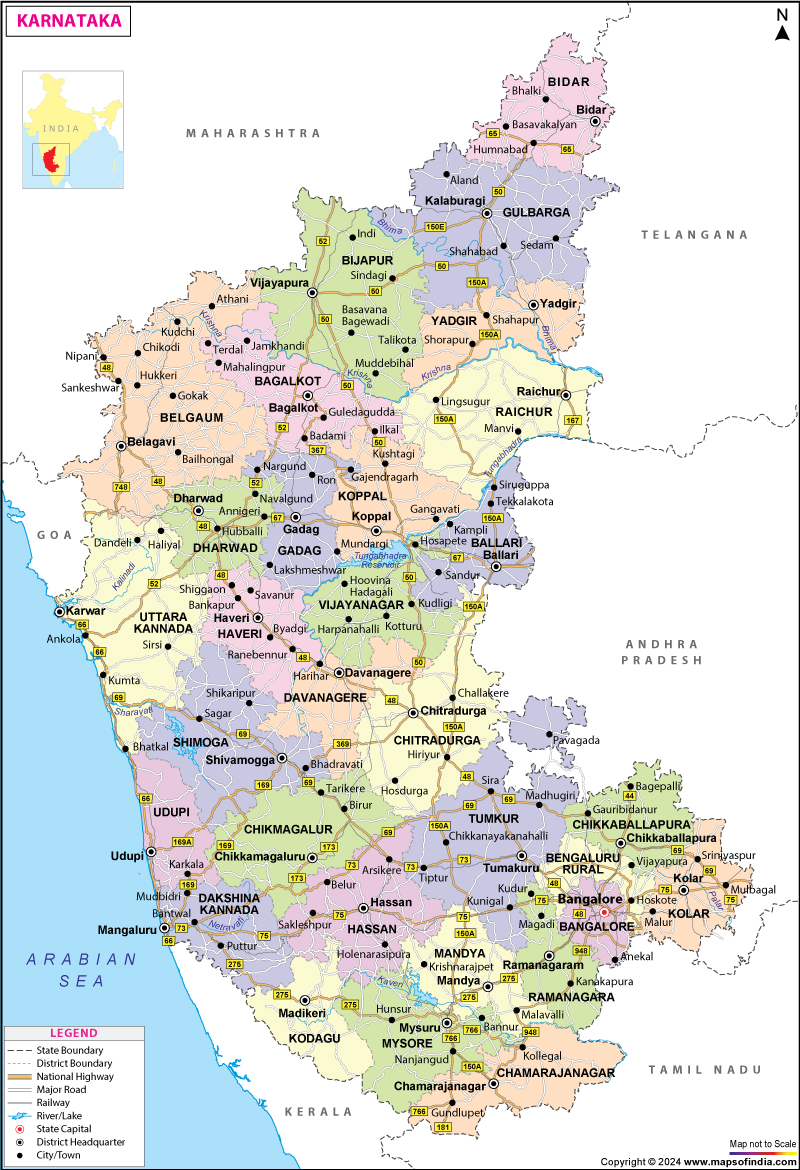

By comparing the political map of Karnataka and our plotted points, we can clearly observe that most of the population lives near the well developed cities of Karnataka:
- Bengaluru (Bangalore)
- Mangaluru (Mangalore)
- Mysuru (Mysore)
- Belagavi (Belgaum)

In [ ]:
def Kmeans(K,arr1,arr2):
  k=K
  indices = np.random.choice(len(arr1), K, replace=False) #Selecting random K points as my Centroids.
  Centroids = [(arr1[i], arr2[i]) for i in indices]
  Clusters=[[] for _ in range(K)]
  while(True):
    Clusters=[[] for _ in range(K)] #Initializing the clusters every time I loop or create new centroid
    for i in range(0,len(arr1)):
      min_dist = float('inf')
      for j in range(0,k): #For each point find the nearest centroid.
        dist=np.sqrt(np.square(arr1[i]-Centroids[j][0])+np.square(arr2[i]-Centroids[j][1]))
        if(dist<min_dist): #Check for the minimum distance
          index=j
          min_dist=dist
      Clusters[index].append((arr1[i],arr2[i],index+1)) #Adding the point along with its label to the proper cluster
    new_centroids=[] #Creating a new list for new Centroids
    for cluster in Clusters:
      X_centroid=0
      Y_centroid=0
      if(len(cluster)==0): #Skipping the cluster if it has no elements
        new_centroids.append((X_centroid,Y_centroid))
        continue
      for tup in cluster:
        X_centroid+=tup[0]
        Y_centroid+=tup[1]
      X_centroid/=len(cluster) #Calculating X co ordinate of the centroid.
      Y_centroid/=len(cluster) #Calculating Y co ordinate of the centroid.
      new_centroids.append((X_centroid,Y_centroid)) #Appending the Centroid to the list.
    difference=0
    for i in range(0,K):
      #Calculating the difference between new centroids and old centroids.
      difference+=np.sqrt(np.square(new_centroids[i][0]-Centroids[i][0])+np.square(new_centroids[i][1]-Centroids[i][1]))
    if(difference<0.00001):
      break #If the new centroids shift is very less then break out of the loop
    else:
      Centroids=new_centroids #Once again looping for the new value of centroids
  return Clusters

In [ ]:
Clusters=Kmeans(11,list(filtered_df['Longitude']),list(filtered_df['Latitude'])) #Creating 11 Clusters
for cluster in Clusters:
  print(cluster)


[(75.783276, 15.271589, 1), (76.137794, 15.579181, 1), (77.087512, 14.908295, 1), (75.7756303, 15.5367584, 1), (75.6870292, 15.0978588, 1), (75.8312593, 15.2686448, 1), (76.8888313, 15.1336581, 1), (76.9171555, 15.1207191, 1), (75.7852541, 15.3643353, 1), (75.7298265, 15.0708436, 1), (75.8623086, 15.2409, 1), (75.6717323, 15.5570895, 1), (75.6521414, 15.4783077, 1), (75.6550275, 15.5196137, 1), (75.6346641, 15.586229, 1), (75.7216106, 15.2965505, 1), (75.6283556, 15.4343731, 1), (75.6103526, 15.3608162, 1), (75.6790172, 15.3671891, 1), (75.6808518, 15.3320844, 1), (75.8337913, 15.401854, 1), (75.6462298, 15.4349524, 1), (75.7294534, 15.4572899, 1), (75.7218467, 15.2964968, 1), (75.7124911, 15.3490145, 1), (75.7124911, 15.3490145, 1), (75.5921994, 15.3944833, 1), (76.0191534, 15.7333321, 1), (75.5573843, 15.5156977, 1), (75.5213569, 15.367629, 1), (76.0788522, 15.1373404, 1), (76.1938218, 15.1852865, 1), (76.1836079, 15.2112932, 1), (76.1793593, 15.1828618, 1), (75.7933777, 15.5751062, 

<ipython-input-82-f9b19db6e601>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(Clusters))  # or 'tab20' if you have more clusters


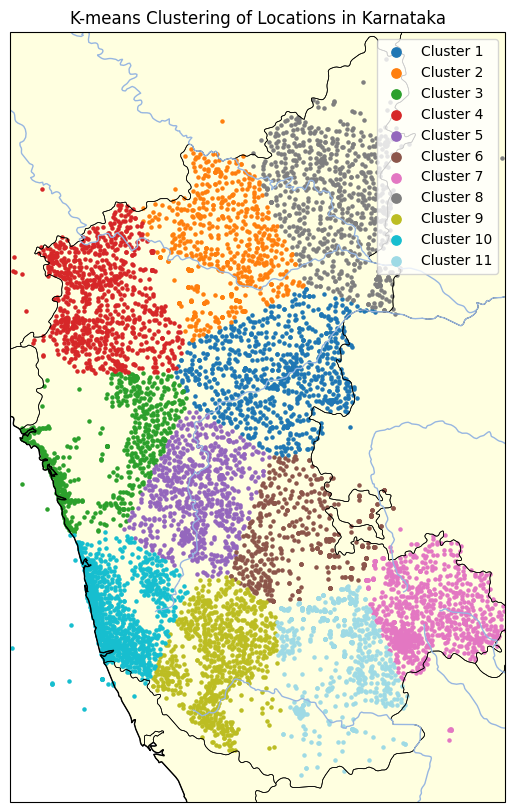

In [ ]:
colors = plt.cm.get_cmap('tab20', len(Clusters))  # or 'tab20' if you have more clusters

# Create the map
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([74.0, 78.5, 11.5, 18.5])  # Zoomed into Karnataka

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightyellow')
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot clusters
for i, cluster in enumerate(Clusters):
    if not cluster:
        continue
    lons = [point[0] for point in cluster]
    lats = [point[1] for point in cluster]
    ax.scatter(lons, lats, color=colors(i), s=5, label=f'Cluster {i+1}', transform=ccrs.PlateCarree())

# Add title and legend
plt.title("K-means Clustering of Locations in Karnataka")
plt.legend(loc='upper right', markerscale=3)
plt.show()

As we had predicted, the distribution is most likely around the developed cities.